### 1. 라이브러리 불러오고 데이터 분석하기

In [1]:
#xgboost 사용하기 위해 설치 진행.

In [2]:
!pip install xgboost --quiet

In [56]:
#의사 결정 트리 나타내기 위해 graphviz 설치

In [42]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 338.4 kB/s eta 0:00:00


In [3]:
from xgboost import XGBRegressor

In [69]:
#필요한 라이브러리 불러옴.
import pandas as pd
import numpy as np
import xgboost as xgb
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image

In [5]:
data = pd.read_csv("diamonds.csv") #데이터 가져오기
data.head() #5번째 행까지 데이터 보기

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [6]:
data = data.drop(columns=["Unnamed: 0"], errors="ignore") #특징이 아닌 첫번째 데이터 삭제
data.head() #5번째 행까지 데이터 보기

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [7]:
print("\n데이터 요약 정보:\n")
print(data.info())  # 데이터 타입 확인


데이터 요약 정보:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


In [8]:
print("\n기술 통계 정보:\n")
print(data.describe())  # 수치형 변수 통계


기술 통계 정보:

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000     

In [9]:
print("\n결측치 확인:")
print(data.isnull().sum())


결측치 확인:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [10]:
# 중복된 행 확인
duplicates = data.duplicated()
print(f"중복된 데이터 개수: {duplicates.sum()}")

# 중복된 데이터 제거
print(f"중복 제거 전 데이터 크기: {data.shape}")
data = data.drop_duplicates()
print(f"중복 제거 후 데이터 크기: {data.shape}")

중복된 데이터 개수: 146
중복 제거 전 데이터 크기: (53940, 10)
중복 제거 후 데이터 크기: (53794, 10)


### Attribute Information


- 가격:미국 달러(\$326--\$18,823)

- 캐럿 무게:다이아몬드의 무게 (0.2--5.01)

- 컷 품질:컷의 품질 (Fair, Good, Very Good, Premium, Ideal)

- 색상:다이아몬드 색상, J (최악)에서 D (최고)까지

- 투명도:다이아몬드의 투명도 측정 (I1 (최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (최고))

- x:길이 (mm) (0--10.74)

- y:너비 (mm) (0--58.9)

- z:깊이 (mm) (0--31.8)

- 깊이:전체 깊이 비율 = z / 평균(x, y) = 2 * z / (x + y) (43--79)

- 테이블:다이아몬드의 가장 넓은 부분에 대한 상단 너비 비율 (43--95)


### 2. 데이터 전처리
- cut(Fair, Good, Very Good, Premium, Ideal), 
- color(J~D),
- clarity(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) 
##### 는 범주형 데이터이므로 원-핫 인코딩한다.

- x
- y
- z
##### 는 depth( = 2 * z / (x + y))에 포함되어 있으므로 제거.

In [11]:
data = pd.get_dummies(data, prefix = ['cut', 'color', 'clarity'], columns=['cut', 'color', 'clarity'])
data = data.drop(columns=['x', 'y', 'z'])

In [12]:
data.head()

carat  depth  table  price  cut_Fair  cut_Good  cut_Ideal  cut_Premium  \
0   0.23   61.5   55.0    326     False     False       True        False   
1   0.21   59.8   61.0    326     False     False      False         True   
2   0.23   56.9   65.0    327     False      True      False        False   
3   0.29   62.4   58.0    334     False     False      False         True   
4   0.31   63.3   58.0    335     False      True      False        False   

   cut_Very Good  color_D  ...  color_I  color_J  clarity_I1  clarity_IF  \
0          False    False  ...    False    False       False       False   
1          False    False  ...    False    False       False       False   
2          False    False  ...    False    False       False       False   
3          False    False  ...     True    False       False       False   
4          False    False  ...    False     True       False       False   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0        False         True        False        False         False   
1         True        False        False        False         False   
2        False        False         True        False         False   
3        False        False        False         True         False   
4        False         True        False        False         False   

   clarity_VVS2  
0         False  
1         False  
2         False  
3         False  
4         False  

[5 rows x 24 columns]

##### 최종 변수: carat, depth, table, 원핫 인코딩된 cut, color, clarity
##### target 값: price

In [13]:
var = [x for x in data.columns if x not in 'price'] ## Removing our target variable

In [14]:
print(len(var))

23


##### var 변수는 target값을 제외한 특성들. 개수는 23개임을 알 수 있음.

### 3. Dataset 학습데이터 및 테스트 데이터 세트로 분할하기

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data[var], data['price'], test_size=0.2, random_state=42)

In [17]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [18]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [33]:
print(f'train samples: {len(X_train_fit)}\ntest samples: {len(X_train_eval)}')

train samples: 34428
test samples: 8607


### 4. 모델 훈련

In [37]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse'
)

eval_set = [(X_train_fit, y_train_fit), (X_train_eval, y_train_eval)]
xgb_model.fit(X_train_fit, y_train_fit, eval_set=eval_set, verbose=True)
y_pred = xgb_model.predict(X_train_eval)

[0]	validation_0-rmse:3639.25315	validation_1-rmse:3665.63300
[1]	validation_0-rmse:3314.67731	validation_1-rmse:3342.61806
[2]	validation_0-rmse:3297.12987	validation_1-rmse:3326.80623
[3]	validation_0-rmse:3003.03212	validation_1-rmse:3033.55344
[4]	validation_0-rmse:2740.40181	validation_1-rmse:2770.64783
[5]	validation_0-rmse:2506.20715	validation_1-rmse:2535.55972
[6]	validation_0-rmse:2495.03809	validation_1-rmse:2525.91641
[7]	validation_0-rmse:2290.25310	validation_1-rmse:2319.65585
[8]	validation_0-rmse:2103.92005	validation_1-rmse:2133.49301
[9]	validation_0-rmse:1936.00346	validation_1-rmse:1964.74109
[10]	validation_0-rmse:1930.85254	validation_1-rmse:1961.09686
[11]	validation_0-rmse:1785.07894	validation_1-rmse:1816.07126
[12]	validation_0-rmse:1654.77236	validation_1-rmse:1685.67751
[13]	validation_0-rmse:1538.54448	validation_1-rmse:1569.52935
[14]	validation_0-rmse:1535.93493	validation_1-rmse:1567.68747
[15]	validation_0-rmse:1432.08911	validation_1-rmse:1463.82328
[1

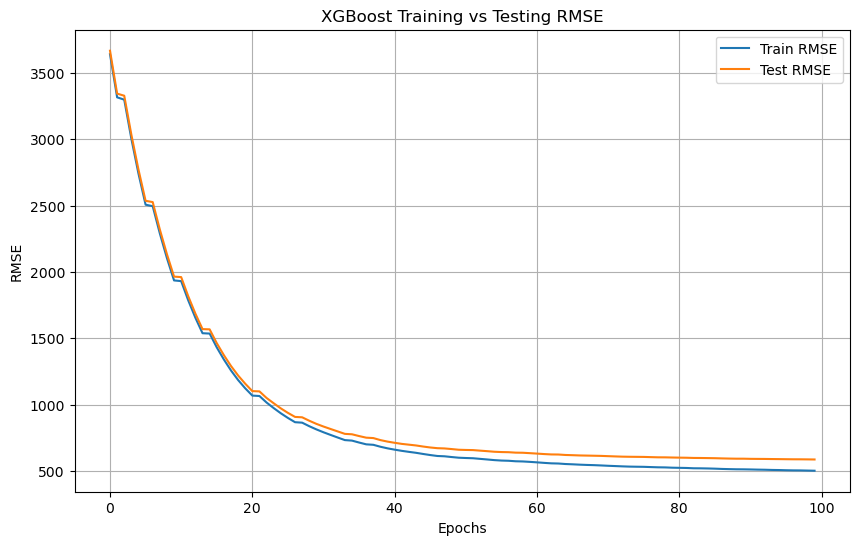

In [35]:
# 시각화
results = xgb_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train RMSE')
plt.plot(x_axis, results['validation_1']['rmse'], label='Test RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE') # Root Mean Squared Error: 예측 값과 실제 값 간의 차이 측정
plt.title('XGBoost Training vs Testing RMSE')
plt.legend()
plt.grid()
plt.show()

In [30]:
train_r2 = r2_score(y_train, xgb_model.predict(X_train))
test_r2 = r2_score(y_test, xgb_model.predict(X_test))
print(f"Metrics train:\n\tR²: {train_r2:.4f}")
print(f"Metrics test:\n\tR²: {test_r2:.4f}")

Metrics train:
	R²: 0.9836
Metrics test:
	R²: 0.9811


In [39]:
from xgboost import plot_tree

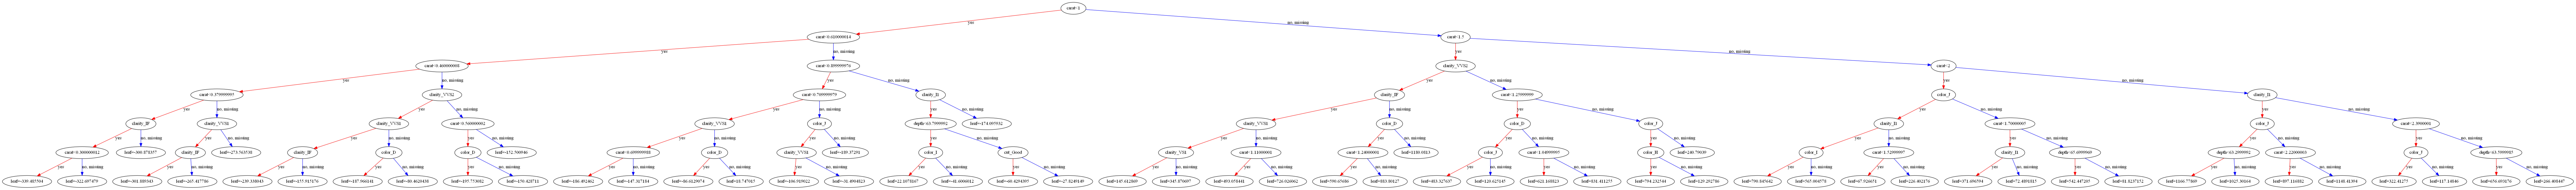

In [55]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 300, 600

# 의사 결정 트리 시각화
plot_tree(xgb_model)
plt.show()

### chat GPT 사용한 부분

- 데이터 구조 확인
- 데이터 중복 데이터 삭제
- xgb model 훈련 결과 시각화 코드